In [44]:
import pandas as pd
import numpy as np

# Visualisation libraries
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

# Users EDA

In [105]:
# Load Users table with selected columns
users_df = pd.read_csv('Dataset/Looker/users.csv', usecols= ['id', 'age', 'gender', 
                                                             'traffic_source', 'country', 
                                                             'latitude', 'longitude'])
print('Number of unique User IDs', len(users_df.id.unique()))
users_df.head()

Number of unique User IDs 100000


,id,age,gender,country,latitude,longitude,traffic_source
0,457,65,M,Brasil,-9.945568,-67.83561,Search
1,6578,34,F,Brasil,-9.945568,-67.83561,Search
2,36280,13,M,Brasil,-9.945568,-67.83561,Email
3,60193,64,M,Brasil,-9.945568,-67.83561,Search
4,64231,25,F,Brasil,-9.945568,-67.83561,Search


In [17]:
# Check for missing values
for column in users_df.columns:
    print('Number of NA values in column', column, '-', len(users_df[users_df[column].isna()]))

Number of NA values in column id - 0
Number of NA values in column age - 0
Number of NA values in column gender - 0
Number of NA values in column country - 0
Number of NA values in column latitude - 0
Number of NA values in column longitude - 0
Number of NA values in column traffic_source - 0


In [18]:
# Descriptive statistics
users_df.describe()

,id,age,latitude,longitude
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,41.054790,28.315885,25.020268
std,28867.657797,17.043914,22.024165,89.989960
min,1.000000,12.000000,-43.007536,-158.164931
25%,25000.750000,26.000000,26.148665,-50.794605
50%,50000.500000,41.000000,35.219886,4.793600
75%,75000.250000,56.000000,40.707772,116.376103
max,100000.000000,70.000000,64.865194,153.560238


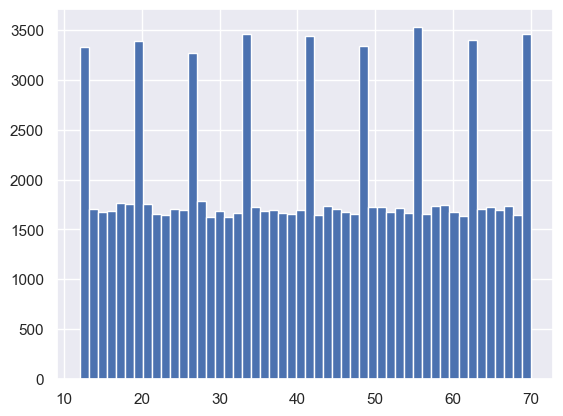

In [15]:
# Histogram of users by age
users_df.age.hist(bins = 50)
plt.show()

In [16]:
# 50-50 split by gender
users_df.groupby('gender').count()

,id,age,country,traffic_source
gender,,,,
F,50208,50208,50208,50208
M,49792,49792,49792,49792


In [20]:
pd.crosstab(users_df['gender'], users_df['age'])

age,12,13,14,15,16,17,18,19,20,21,...,61,62,63,64,65,66,67,68,69,70
gender,,,,,,,,,,,,,,,,,,,,,
F,865,814,878,815,832,864,880,831,876,855,...,810,808,837,843,828,853,877,841,903,861
M,820,828,824,858,849,903,871,785,894,899,...,821,874,879,863,896,844,855,805,819,873


In [17]:
# 5 traffic sources
users_df[['id','traffic_source']].groupby('traffic_source').count()

,id
traffic_source,
Display,4052
Email,4947
Facebook,5816
Organic,15110
Search,70075


In [21]:
pd.crosstab(users_df['gender'], users_df['traffic_source'])

traffic_source,Display,Email,Facebook,Organic,Search
gender,,,,,
F,2086,2527,2899,7535,35161
M,1966,2420,2917,7575,34914


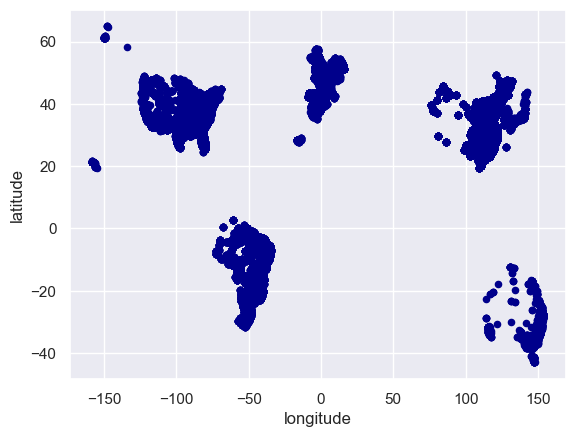

In [19]:
# Location of sales
users_df.plot.scatter(x='longitude',
                      y='latitude',
                      c='DarkBlue')

plt.show()

In [68]:
# Potentially remove small countries or focus on US - can be an angle for comparison
# Rename countries
users_df[['id','country']].groupby('country').count()

,id
country,
Australia,2146
Austria,2
Belgium,1185
Brasil,14507
China,34150
Colombia,17
Deutschland,2
España,2
France,4700


In [106]:
# Rename coutries with multiple spellings or misspelled name
users_df['country'][users_df['country'] == 'España'] = 'Spain'
users_df['country'][users_df['country'] == 'Deutschland'] = 'Germany'
users_df['country'][users_df['country'] == 'Brasil'] = 'Brazil'

coutries_df = users_df[['id','country']].groupby('country').count().sort_values('id', ascending = False)
coutries_df = coutries_df.rename(columns = {'id': 'users'})
coutries_df

/var/folders/85/skcmpdkj6r7drn55_56pd22c0000gn/T/ipykernel_33097/3835751630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df['country'][users_df['country'] == 'España'] = 'Spain'
/var/folders/85/skcmpdkj6r7drn55_56pd22c0000gn/T/ipykernel_33097/3835751630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df['country'][users_df['country'] == 'Deutschland'] = 'Germany'
/var/folders/85/skcmpdkj6r7drn55_56pd22c0000gn/T/ipykernel_33097/3835751630.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

,users
country,
China,34150
United States,22522
Brazil,14507
South Korea,5316
France,4700
United Kingdom,4561
Germany,4157
Spain,4064
Japan,2438


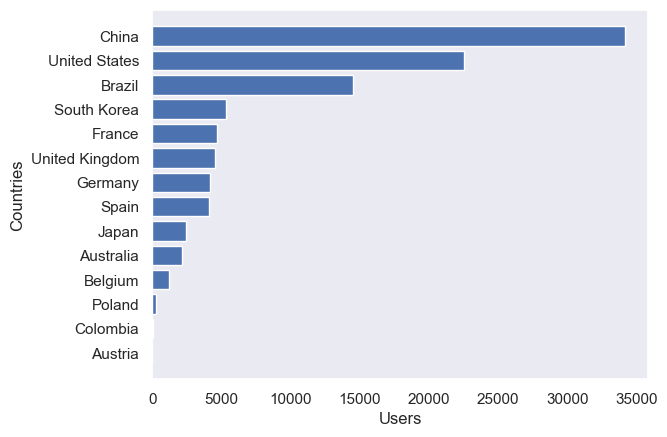

In [71]:
# Number of users by country
fig, ax = plt.subplots()
y_pos = np.arange(len(coutries_df.index))
ax.barh(coutries_df.index, coutries_df.users, align='center')
ax.set_yticks(y_pos, labels=coutries_df.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Users')
ax.set_ylabel('Countries')
ax.grid(None)
plt.show()

In [107]:
# List of countries with low number of users to be removed
countries_to_keep = list(coutries_df[coutries_df['users'] > 4000].index)
users_df = users_df[users_df.country.isin(countries_to_keep)]
print('Numer of users remaining after removal or countries:', len(users_df))
users_df = users_df.reset_index(drop = True)
users_df.head()

Numer of users remaining after removal or countries: 93977


,id,age,gender,country,latitude,longitude,traffic_source
0,457,65,M,Brazil,-9.945568,-67.83561,Search
1,6578,34,F,Brazil,-9.945568,-67.83561,Search
2,36280,13,M,Brazil,-9.945568,-67.83561,Email
3,60193,64,M,Brazil,-9.945568,-67.83561,Search
4,64231,25,F,Brazil,-9.945568,-67.83561,Search


# Orders table
- Take into account only orders from the last 2 years

In [7]:
orders_df = pd.read_csv('Dataset/Looker/orders.csv')
print('Number of orders:', len(orders_df))
orders_df.head()

Number of orders: 125226


,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3
1,60,44,Cancelled,F,2023-01-20 02:12:00+00:00,NaN,NaN,NaN,1
2,64,46,Cancelled,F,2021-12-06 09:11:00+00:00,NaN,NaN,NaN,1
3,89,65,Cancelled,F,2020-08-13 09:58:00+00:00,NaN,NaN,NaN,1
4,102,76,Cancelled,F,2023-01-17 08:17:00+00:00,NaN,NaN,NaN,2


In [8]:
# Drop time zone info and microseconds
orders_df['created_at'] = orders_df['created_at'].apply(lambda x: drop_time_zone(x))
orders_df.head()

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,8,5,Cancelled,F,2022-10-20 10:03:00,NaN,NaN,NaN,3
1,60,44,Cancelled,F,2023-01-20 02:12:00,NaN,NaN,NaN,1
2,64,46,Cancelled,F,2021-12-06 09:11:00,NaN,NaN,NaN,1
3,89,65,Cancelled,F,2020-08-13 09:58:00,NaN,NaN,NaN,1
4,102,76,Cancelled,F,2023-01-17 08:17:00,NaN,NaN,NaN,2


In [5]:
def drop_time_zone(string):
    if '.' in string:   
        date = string.split('.')[0]
    else:
        date = string.split('+')[0]
    return(date)

In [73]:
# Change date to date/time format
orders_df['created_at'] = pd.to_datetime(orders_df['created_at'], format = "%Y-%m-%d %H:%M:%S", errors = 'coerce')
orders_df['created_at'].describe()

count                           125226
mean     2022-10-25 00:25:31.415376896
min                2019-01-06 05:30:00
25%                2022-02-26 07:50:00
50%                2023-02-20 08:08:00
75%                2023-09-26 09:51:30
max                2024-01-17 19:46:14
Name: created_at, dtype: object

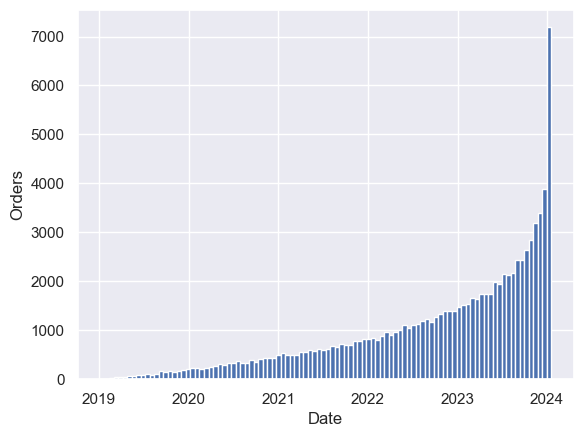

In [12]:
# Completed orders for all time
orders_df[(orders_df['status'] != 'Cancelled')&(orders_df['status']!= 'Returned')].created_at.hist(bins = 100)
plt.xlabel('Date')
plt.ylabel('Orders')
plt.show()

In [84]:
# Reduce timeframe for 2022 - 2023
# Orders created from '2022-01-01 00:00:00'
orders_df = orders_df[orders_df['created_at'] >= pd.Timestamp('2022-01-01T00')]
# Orders created by '2024-01-01 0:00:00'
orders_df = orders_df[orders_df['created_at'] < pd.Timestamp('2024-01-01T00')]
print('Numer of orders between 2022 and 2023:', len(orders_df))
print('Numer of users who made orders between 2022 and 2023:', len(orders_df.user_id.unique()))
orders_df.head()

Numer of orders between 2022 and 2023: 88212
Numer of users who made orders between 2022 and 2023: 61752


,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,8,5,Cancelled,F,2022-10-20 10:03:00,NaN,NaN,NaN,3
1,60,44,Cancelled,F,2023-01-20 02:12:00,NaN,NaN,NaN,1
4,102,76,Cancelled,F,2023-01-17 08:17:00,NaN,NaN,NaN,2
5,117,89,Cancelled,F,2023-07-31 13:25:00,NaN,NaN,NaN,1
7,153,124,Cancelled,F,2022-07-10 16:42:00,NaN,NaN,NaN,2


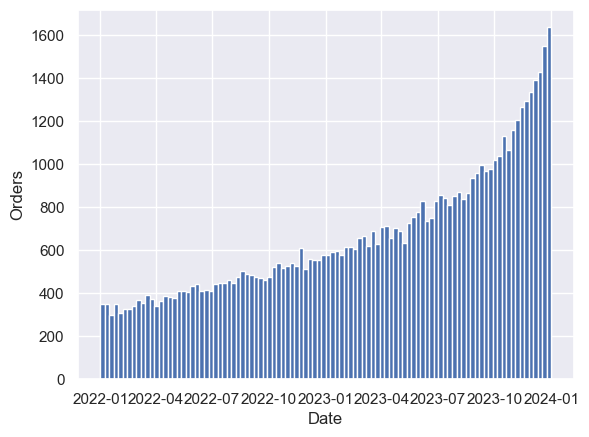

In [82]:
# Completed orders for analysed period
orders_df[(orders_df['status'] != 'Cancelled')&(orders_df['status']!= 'Returned')].created_at.hist(bins = 100)
plt.xlabel('Date')
plt.ylabel('Orders')
plt.show()

## Recency

In [85]:
orders_df[['order_id','status']].groupby('status').count().sort_values('order_id', ascending = False)

,order_id
status,
Shipped,26419
Complete,22098
Processing,17719
Cancelled,13148
Returned,8828


In [101]:
# Only orders with status Shipped or Complete
valid_orders = orders_df[(orders_df['status'] == 'Complete')|(orders_df['status']== 'Shipped')]
print('Number of completed orders:', len(valid_orders))
latest_orders = valid_orders[['user_id','created_at']].groupby('user_id').max()
print('Number of users with completed orders:', len(latest_orders))

# Recency: number of days since last order
last_order = valid_orders.created_at.max() + pd.DateOffset(1)
latest_orders['days_since_lo'] = latest_orders['created_at'].apply(lambda x:(last_order.date() - x.date()).days)
latest_orders.head()

Number of completed orders: 48517
Number of users with completed orders: 39373


,created_at,days_since_lo
user_id,,
1,2022-07-18 12:55:00,532
2,2022-02-20 10:34:00,680
3,2023-04-02 09:13:00,274
4,2022-10-18 09:31:00,440
6,2022-04-08 04:38:00,633


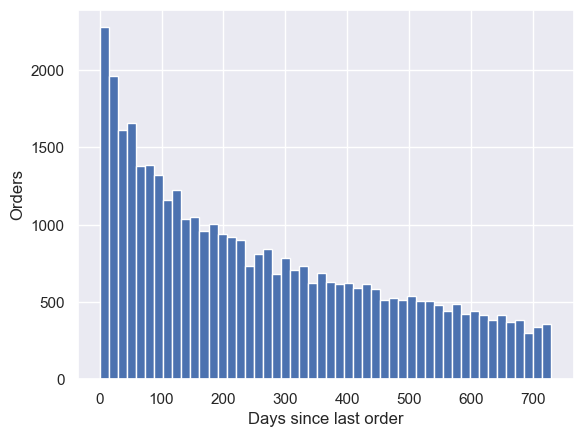

In [102]:
# Histogram of number of days since last order
latest_orders.days_since_lo.hist(bins = 50)
plt.xlabel('Days since last order')
plt.ylabel('Orders')
plt.show()

In [110]:
# Adding information about recency - drop customers that did not make any orders
print('Number of users in user table:', len(users_df))
print('Number of users in users in consoldated table:', len(latest_orders))
all_user_data = pd.merge(users_df, latest_orders['days_since_lo'],
                            left_on=['id'], 
                            right_on=['user_id'], 
                            how = 'left')
print('Number of users after merge:', len(all_user_data))
all_user_data.head()

Number of users in user table: 93977
Number of users in users in consoldated table: 39373
Number of users after merge: 93977


,id,age,gender,country,latitude,longitude,traffic_source,days_since_lo
0,457,65,M,Brazil,-9.945568,-67.83561,Search,85.0
1,6578,34,F,Brazil,-9.945568,-67.83561,Search,NaN
2,36280,13,M,Brazil,-9.945568,-67.83561,Email,NaN
3,60193,64,M,Brazil,-9.945568,-67.83561,Search,NaN
4,64231,25,F,Brazil,-9.945568,-67.83561,Search,280.0


In [113]:
# Remove users that did not make any orders
all_user_data = all_user_data.dropna(subset = ['days_since_lo'])
print('Number of users removing users with no orders:', len(all_user_data))
all_user_data.head()

Number of users removing users with no orders: 37060


,id,age,gender,country,latitude,longitude,traffic_source,days_since_lo
0,457,65,M,Brazil,-9.945568,-67.835610,Search,85.0
4,64231,25,F,Brazil,-9.945568,-67.835610,Search,280.0
5,72187,47,F,Brazil,-9.945568,-67.835610,Search,88.0
14,95069,48,M,Brazil,-9.857324,-69.437057,Search,645.0
18,21246,62,M,Brazil,-8.325245,-71.553030,Email,77.0


## Cancellations & returns

In [115]:
# Number of cancellations per user
cancellations = orders_df[['user_id','status']][orders_df['status']=='Cancelled'].groupby('user_id').count()
print('Number of users with cancellations:', len(cancellations))
cancellations = cancellations.rename(columns={"status": "cancellations"})
cancellations.sort_values('cancellations', ascending = False).head(10)

Number of users with cancellations: 12376


,cancellations
user_id,
81551,3
55484,3
3286,3
23536,3
27572,3
47162,3
62193,3
55709,3
51816,3


In [117]:
# Merging number of cancellations with the rest
print('Number of users in user table:', len(all_user_data))
print('Number of users in users with cancellations:', len(cancellations))
all_user_data = pd.merge(all_user_data, cancellations,
                            left_on=['id'], 
                            right_on=['user_id'], 
                            how='left')
print('Number of users after merge:', len(all_user_data))
all_user_data.head()

Number of users in user table: 37060
Number of users in users with cancellations: 12376
Number of users after merge: 37060


,id,age,gender,country,latitude,longitude,traffic_source,days_since_lo,cancellations
0,457,65,M,Brazil,-9.945568,-67.835610,Search,85.0,NaN
1,64231,25,F,Brazil,-9.945568,-67.835610,Search,280.0,NaN
2,72187,47,F,Brazil,-9.945568,-67.835610,Search,88.0,NaN
3,95069,48,M,Brazil,-9.857324,-69.437057,Search,645.0,1.0
4,21246,62,M,Brazil,-8.325245,-71.553030,Email,77.0,NaN


In [116]:
# Number of returns per user
returns = orders_df[['user_id','status']][orders_df['status']=='Returned'].groupby('user_id').count()
print('Number of users with returns:', len(returns))
returns = returns.rename(columns={"status": "returns"})
returns.sort_values('returns', ascending = False).head(10)

Number of users with returns: 8506


,returns
user_id,
62428,3
34926,3
27170,3
46216,3
93091,3
36776,3
39995,3
44885,3
11470,3


In [118]:
# Merging number of returns with the rest
print('Number of users in user table:', len(all_user_data))
print('Number of users in users with returns:', len(returns))
all_user_data = pd.merge(all_user_data, returns,
                            left_on=['id'], 
                            right_on=['user_id'], 
                            how='left')
print('Number of users after merge:', len(all_user_data))
all_user_data.head()

Number of users in user table: 37060
Number of users in users with returns: 8506
Number of users after merge: 37060


,id,age,gender,country,latitude,longitude,traffic_source,days_since_lo,cancellations,returns
0,457,65,M,Brazil,-9.945568,-67.835610,Search,85.0,NaN,NaN
1,64231,25,F,Brazil,-9.945568,-67.835610,Search,280.0,NaN,NaN
2,72187,47,F,Brazil,-9.945568,-67.835610,Search,88.0,NaN,NaN
3,95069,48,M,Brazil,-9.857324,-69.437057,Search,645.0,1.0,1.0
4,21246,62,M,Brazil,-8.325245,-71.553030,Email,77.0,NaN,NaN


In [119]:
all_user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37060 entries, 0 to 37059
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              37060 non-null  int64  
 1   age             37060 non-null  int64  
 2   gender          37060 non-null  object 
 3   country         37060 non-null  object 
 4   latitude        37060 non-null  float64
 5   longitude       37060 non-null  float64
 6   traffic_source  37060 non-null  object 
 7   days_since_lo   37060 non-null  float64
 8   cancellations   3931 non-null   float64
 9   returns         2681 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.8+ MB


In [120]:
# Replace NaN for cancellations and returns to 0
all_user_data['cancellations'][all_user_data.cancellations.isna()] = 0
all_user_data['returns'][all_user_data.returns.isna()] = 0
all_user_data.head()

/var/folders/85/skcmpdkj6r7drn55_56pd22c0000gn/T/ipykernel_33097/2612628297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_user_data['cancellations'][all_user_data.cancellations.isna()] = 0
/var/folders/85/skcmpdkj6r7drn55_56pd22c0000gn/T/ipykernel_33097/2612628297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_user_data['returns'][all_user_data.returns.isna()] = 0


,id,age,gender,country,latitude,longitude,traffic_source,days_since_lo,cancellations,returns
0,457,65,M,Brazil,-9.945568,-67.835610,Search,85.0,0.0,0.0
1,64231,25,F,Brazil,-9.945568,-67.835610,Search,280.0,0.0,0.0
2,72187,47,F,Brazil,-9.945568,-67.835610,Search,88.0,0.0,0.0
3,95069,48,M,Brazil,-9.857324,-69.437057,Search,645.0,1.0,1.0
4,21246,62,M,Brazil,-8.325245,-71.553030,Email,77.0,0.0,0.0


## Frequency: number of orders & items ordered

In [123]:
# Number of orders by status
valid_orders[['status','order_id']].groupby('status').count()

,order_id
status,
Complete,22098
Shipped,26419


In [124]:
# Dataframe with number of orders per customer and number of items ordered
order_details = valid_orders.groupby('user_id').agg(
                                                    no_orders = ('order_id', 'count'),
                                                    no_items = ('num_of_item', 'sum')
                                                    )
order_details['items_per_order'] = order_details.no_items / order_details.no_orders
order_details.head()

,no_orders,no_items,items_per_order
user_id,,,
1,1,3,3.0
2,1,1,1.0
3,2,3,1.5
4,1,1,1.0
6,1,2,2.0


In [125]:
# Merging order details with the rest
print('Number of users in user table:', len(all_user_data))
print('Number of users in users with order details:', len(order_details))
all_user_data = pd.merge(all_user_data, order_details,
                            left_on=['id'], 
                            right_on=['user_id'], 
                            how='left')
print('Number of users after merge:', len(all_user_data))
all_user_data.head()

Number of users in user table: 37060
Number of users in users with order details: 39373
Number of users after merge: 37060


,id,age,gender,country,latitude,longitude,traffic_source,days_since_lo,cancellations,returns,no_orders,no_items,items_per_order
0,457,65,M,Brazil,-9.945568,-67.835610,Search,85.0,0.0,0.0,1,1,1.0
1,64231,25,F,Brazil,-9.945568,-67.835610,Search,280.0,0.0,0.0,1,1,1.0
2,72187,47,F,Brazil,-9.945568,-67.835610,Search,88.0,0.0,0.0,1,1,1.0
3,95069,48,M,Brazil,-9.857324,-69.437057,Search,645.0,1.0,1.0,1,1,1.0
4,21246,62,M,Brazil,-8.325245,-71.553030,Email,77.0,0.0,0.0,2,3,1.5


## Order Items table - Monetary value

In [127]:
order_items = pd.read_csv('Dataset/Looker/order_items.csv')
order_items.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaN,NaN,0.02
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaN,NaN,0.02


In [128]:
# Megre order items with completed orders
orders_details = pd.merge(valid_orders, order_items,
                            left_on=['order_id', 'user_id'], 
                            right_on=['order_id', 'user_id'], 
                            how='left')
print('Number of rows:', len(orders_details))
print('Number of unique orders:', orders_details.order_id.nunique())
orders_details.head()

Number of rows: 70353
Number of unique orders: 48517


,order_id,user_id,status_x,gender,created_at_x,returned_at_x,shipped_at_x,delivered_at_x,num_of_item,id,product_id,inventory_item_id,status_y,created_at_y,shipped_at_y,delivered_at_y,returned_at_y,sale_price
0,7,4,Complete,F,2022-10-18 09:31:00,NaN,2022-10-19 00:36:00+00:00,2022-10-20 13:24:00+00:00,1,10,1035,26,Complete,2022-10-18 06:17:54+00:00,2022-10-19 00:36:00+00:00,2022-10-20 13:24:00+00:00,NaN,148.000000
1,35,24,Complete,F,2023-11-19 04:30:00,NaN,2023-11-21 02:49:00+00:00,2023-11-23 03:36:00+00:00,1,54,5119,151,Complete,2023-11-19 03:44:24+00:00,2023-11-21 02:49:00+00:00,2023-11-23 03:36:00+00:00,NaN,39.990002
2,39,29,Complete,F,2022-08-06 18:29:00,NaN,2022-08-09 17:37:00+00:00,2022-08-14 08:58:00+00:00,1,58,5916,163,Complete,2022-08-06 17:57:12+00:00,2022-08-09 17:37:00+00:00,2022-08-14 08:58:00+00:00,NaN,44.000000
3,45,34,Complete,F,2023-06-08 11:36:00,NaN,2023-06-10 03:39:00+00:00,2023-06-12 22:42:00+00:00,1,70,9336,199,Complete,2023-06-08 07:57:34+00:00,2023-06-10 03:39:00+00:00,2023-06-12 22:42:00+00:00,NaN,36.000000
4,55,42,Complete,F,2023-10-25 16:32:00,NaN,2023-10-26 04:52:00+00:00,2023-10-28 01:17:00+00:00,1,85,8910,241,Complete,2023-10-25 14:32:25+00:00,2023-10-26 04:52:00+00:00,2023-10-28 01:17:00+00:00,NaN,7.870000


In [129]:
# Select columns that will be used for analysis
orders_details = orders_details[['user_id','order_id','product_id', 'sale_price' ]]
orders_details.head()

,user_id,order_id,product_id,sale_price
0,4,7,1035,148.000000
1,24,35,5119,39.990002
2,29,39,5916,44.000000
3,34,45,9336,36.000000
4,42,55,8910,7.870000


### Total Spend

In [130]:
# Total monetary value per user
total_spend = orders_details[['user_id', 'sale_price']].groupby('user_id').sum()
total_spend = total_spend.rename(columns={"sale_price": "total_spend"})
total_spend.head()

,total_spend
user_id,
1,159.990000
2,22.000000
3,233.459999
4,148.000000
6,144.820004


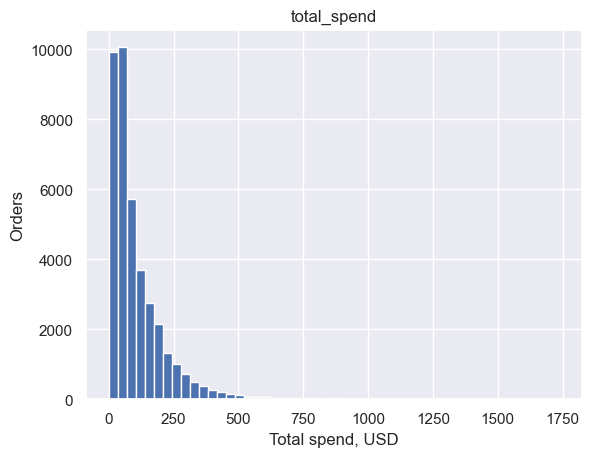

In [131]:
# Histogram for total spend
total_spend.hist(bins = 50)
plt.xlabel('Total spend, USD')
plt.ylabel('Orders')
plt.show()

In [132]:
# Merge total spend data with the rest
print('Number of users in user table:', len(all_user_data))
print('Number of users in users with spend details:', len(total_spend))
all_user_data = pd.merge(all_user_data, total_spend,
                            left_on=['id'], 
                            right_on=['user_id'], 
                            how='left')
print('Number of users after merge:', len(all_user_data))
all_user_data.head()

Number of users in user table: 37060
Number of users in users with spend details: 39373
Number of users after merge: 37060


,id,age,gender,country,latitude,longitude,traffic_source,days_since_lo,cancellations,returns,no_orders,no_items,items_per_order,total_spend
0,457,65,M,Brazil,-9.945568,-67.835610,Search,85.0,0.0,0.0,1,1,1.0,99.989998
1,64231,25,F,Brazil,-9.945568,-67.835610,Search,280.0,0.0,0.0,1,1,1.0,39.950001
2,72187,47,F,Brazil,-9.945568,-67.835610,Search,88.0,0.0,0.0,1,1,1.0,21.000000
3,95069,48,M,Brazil,-9.857324,-69.437057,Search,645.0,1.0,1.0,1,1,1.0,39.500000
4,21246,62,M,Brazil,-8.325245,-71.553030,Email,77.0,0.0,0.0,2,3,1.5,145.139999


### Average order value

In [134]:
# Add column with average order value
all_user_data['avg_order_value'] = all_user_data['total_spend']/all_user_data['no_orders']
all_user_data.head()

,id,age,gender,country,latitude,longitude,traffic_source,days_since_lo,cancellations,returns,no_orders,no_items,items_per_order,total_spend,avg_order_value
0,457,65,M,Brazil,-9.945568,-67.835610,Search,85.0,0.0,0.0,1,1,1.0,99.989998,99.989998
1,64231,25,F,Brazil,-9.945568,-67.835610,Search,280.0,0.0,0.0,1,1,1.0,39.950001,39.950001
2,72187,47,F,Brazil,-9.945568,-67.835610,Search,88.0,0.0,0.0,1,1,1.0,21.000000,21.000000
3,95069,48,M,Brazil,-9.857324,-69.437057,Search,645.0,1.0,1.0,1,1,1.0,39.500000,39.500000
4,21246,62,M,Brazil,-8.325245,-71.553030,Email,77.0,0.0,0.0,2,3,1.5,145.139999,72.570000


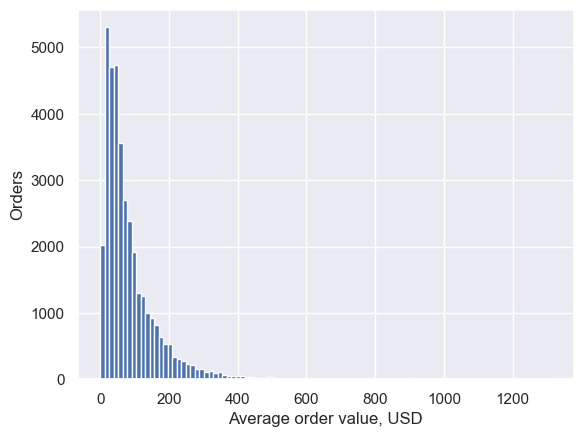

In [135]:
# Histogram for average order value
all_user_data.avg_order_value.hist(bins = 100)
plt.xlabel('Average order value, USD')
plt.ylabel('Orders')
plt.show()

# Merge with demo data -> Final dataset for training

In [137]:
# Load demo data
demo_df = pd.read_csv('Dataset/demo_data.csv')
print('Number of records in demo data:', len(demo_df))
demo_df.head()

Number of records in demo data: 66254


,id,age,gender,income_category,children_at_home
0,457,65,M,high,0.0
1,36280,13,M,NaN,0.0
2,60193,64,M,high,0.0
3,64231,25,F,medium,0.0
4,72187,47,F,low,1.0


In [138]:
# Merge total spend data with the rest
print('Number of users in user table:', len(all_user_data))
all_user_data = pd.merge(all_user_data, demo_df[['id', 'income_category', 'children_at_home']],
                            left_on=['id'], 
                            right_on=['id'], 
                            how='left')
print('Number of users after merge:', len(all_user_data))
all_user_data.head()

Number of users in user table: 37060
Number of users after merge: 37060


,id,age,gender,country,latitude,longitude,traffic_source,days_since_lo,cancellations,returns,no_orders,no_items,items_per_order,total_spend,avg_order_value,income_category,children_at_home
0,457,65,M,Brazil,-9.945568,-67.835610,Search,85.0,0.0,0.0,1,1,1.0,99.989998,99.989998,high,0.0
1,64231,25,F,Brazil,-9.945568,-67.835610,Search,280.0,0.0,0.0,1,1,1.0,39.950001,39.950001,medium,0.0
2,72187,47,F,Brazil,-9.945568,-67.835610,Search,88.0,0.0,0.0,1,1,1.0,21.000000,21.000000,low,1.0
3,95069,48,M,Brazil,-9.857324,-69.437057,Search,645.0,1.0,1.0,1,1,1.0,39.500000,39.500000,low,1.0
4,21246,62,M,Brazil,-8.325245,-71.553030,Email,77.0,0.0,0.0,2,3,1.5,145.139999,72.570000,high,1.0


In [142]:
# Replace NaN for income_category to None
all_user_data['income_category'][all_user_data.income_category.isna()] = 'none'
all_user_data[['id','income_category']].groupby(by='income_category', dropna=False).count()

/var/folders/85/skcmpdkj6r7drn55_56pd22c0000gn/T/ipykernel_33097/2480348341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_user_data['income_category'][all_user_data.income_category.isna()] = 'none'


,id
income_category,
high,6227
low,18292
medium,10081
none,2460


In [144]:
all_user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37060 entries, 0 to 37059
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                37060 non-null  int64  
 1   age               37060 non-null  int64  
 2   gender            37060 non-null  object 
 3   country           37060 non-null  object 
 4   latitude          37060 non-null  float64
 5   longitude         37060 non-null  float64
 6   traffic_source    37060 non-null  object 
 7   days_since_lo     37060 non-null  float64
 8   cancellations     37060 non-null  float64
 9   returns           37060 non-null  float64
 10  no_orders         37060 non-null  int64  
 11  no_items          37060 non-null  int64  
 12  items_per_order   37060 non-null  float64
 13  total_spend       37060 non-null  float64
 14  avg_order_value   37060 non-null  float64
 15  income_category   37060 non-null  object 
 16  children_at_home  37060 non-null  float6

In [145]:
all_user_data.describe()

,id,age,latitude,longitude,days_since_lo,cancellations,returns,no_orders,no_items,items_per_order,total_spend,avg_order_value,children_at_home
count,37060.000000,37060.000000,37060.000000,37060.000000,37060.000000,37060.000000,37060.000000,37060.000000,37060.000000,37060.000000,37060.000000,37060.000000,37060.000000
mean,49991.132191,41.081489,29.289708,19.741091,263.155909,0.114382,0.075742,1.232731,1.788667,1.450798,106.805341,86.611609,0.463303
std,28873.875089,17.012206,20.386459,88.967851,204.219476,0.344577,0.277238,0.515700,1.163348,0.763737,114.629940,90.370933,0.498658
min,1.000000,12.000000,-31.778183,-158.164931,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.020000,0.020000,0.000000
25%,25093.750000,26.000000,26.716429,-56.158850,84.000000,0.000000,0.000000,1.000000,1.000000,1.000000,34.160000,31.785001,0.000000
50%,49978.000000,41.000000,35.160322,2.239188,216.000000,0.000000,0.000000,1.000000,1.000000,1.000000,68.949997,59.000000,0.000000
75%,74797.250000,56.000000,40.715618,115.033993,416.000000,0.000000,0.000000,1.000000,2.000000,2.000000,140.000000,109.980003,1.000000
max,99999.000000,70.000000,64.865194,132.025637,730.000000,3.000000,3.000000,4.000000,10.000000,4.000000,1738.969982,1312.570004,1.000000


In [147]:
# Export file for modelling to CSV
all_user_data.to_csv('Dataset/all_user_data.csv', header = True, index = False)

# Correlation

In [150]:
all_user_data.columns

Index(['id', 'age', 'gender', 'country', 'latitude', 'longitude',
       'traffic_source', 'days_since_lo', 'cancellations', 'returns',
       'no_orders', 'no_items', 'items_per_order', 'total_spend',
       'avg_order_value', 'income_category', 'children_at_home'],
      dtype='object')

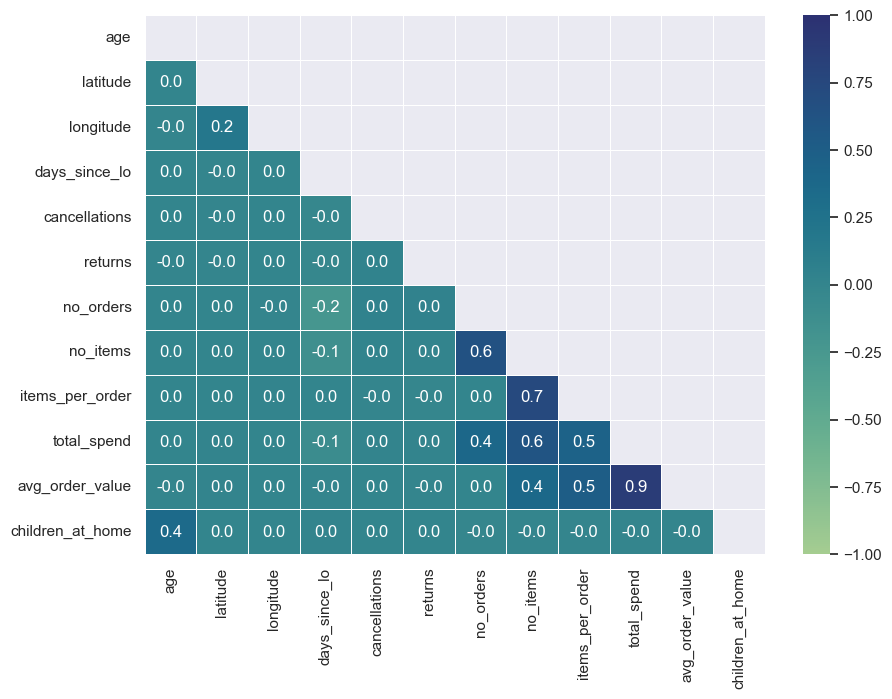

In [154]:
columns = ['age', 'latitude', 'longitude', 'days_since_lo', 'cancellations', 'returns',
           'no_orders', 'no_items', 'items_per_order', 'total_spend',
           'avg_order_value', 'children_at_home']
# Correlation matrix
corr = all_user_data[columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap="crest", annot = True, vmin=-1, vmax=1, 
            fmt=".1f",  mask = mask, linewidth=.5) 
plt.xticks(rotation = 90)
plt.grid(visible = None)
plt.show()

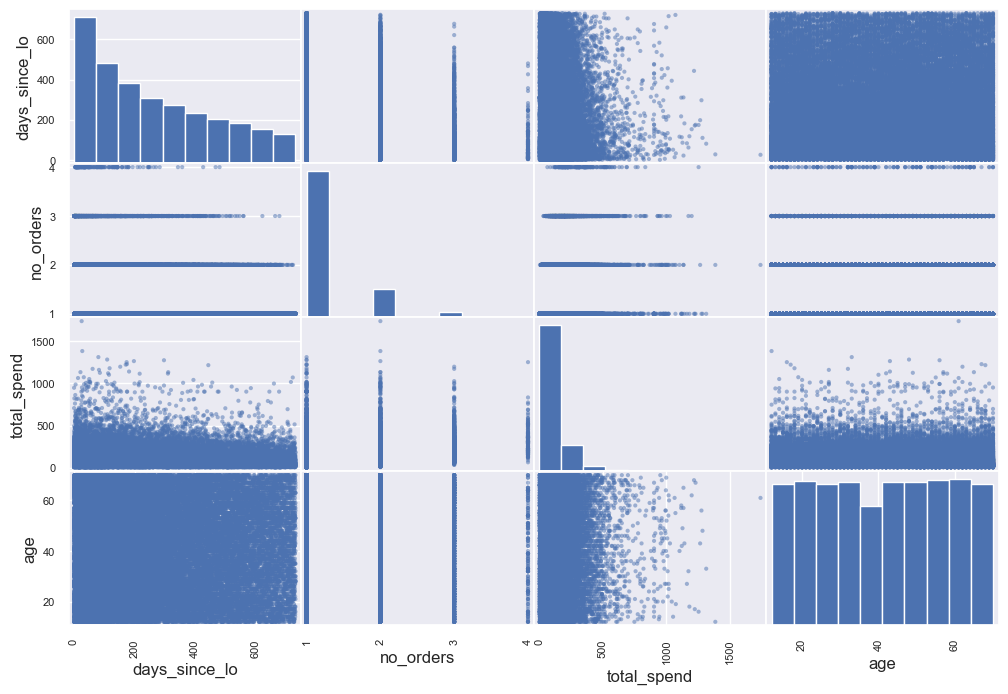

In [158]:
# Scatter matrix for the continuous features
scatter_matrix(all_user_data[['days_since_lo', 'no_orders', 'total_spend', 'age']], figsize=(12,8))
plt.show()